## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.display import display

# for date manipulation
from datetime import datetime

# for visualization: matplotlib
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
# to display visuals in the notebook

# for visualization: seaborn
import seaborn as sns
sns.set_context(font_scale=2)

# for visualization: plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot


# to cleanup memory usage
import gc

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from os import path
home = path.abspath(path.join("__file__",".."))
print(home)

# Any results you write to the current directory are saved as output.

/Users/anniecondon/Documents/hackathon/climate_change_hackathon.nosync/notebooks


## Read in data to dataframes

Read in hourly demand data for Tampa for 2017, 2018, and 2019 - Source = PUDL

In [2]:
ferc714_hourly_demand_tampa = pd.read_csv(home + '/tampa_electric_co_demand_hourly.csv')

In [3]:
ferc714_hourly_demand_tampa

,Unnamed: 0,respondent_id_ferc714,report_date,utc_datetime,timezone,demand_mwh
0,546413,262,2017-01-01 00:00:00,2017-01-01 05:00:00,America/New_York,1549.000
1,1166556,262,2017-01-01 00:00:00,2017-01-01 06:00:00,America/New_York,1492.000
2,1786699,262,2017-01-01 00:00:00,2017-01-01 07:00:00,America/New_York,1424.000
3,2406842,262,2017-01-01 00:00:00,2017-01-01 08:00:00,America/New_York,1402.000
4,3026985,262,2017-01-01 00:00:00,2017-01-01 09:00:00,America/New_York,1390.000
...,...,...,...,...,...,...
26275,12391179,262,2019-01-01 00:00:00,2020-01-01 00:00:00,America/New_York,2106.000
26276,13011322,262,2019-01-01 00:00:00,2020-01-01 01:00:00,America/New_York,1988.000
26277,13631465,262,2019-01-01 00:00:00,2020-01-01 02:00:00,America/New_York,1868.000
26278,14251608,262,2019-01-01 00:00:00,2020-01-01 03:00:00,America/New_York,1762.000


Read in hourly weather data for Tampa for 2017, 2018, and 2019 - Source = NSRDB

In [4]:
import os
import csv

# fields = []
# rows = []

# for filename in os.listdir(home + '/tampa_weather_data_2017_2019/'):
#     print(filename)
#     #filename = pd.read_csv(os.path.join(home + '/tampa_weather_data_2017_2019/', filename)

import pandas as pd
import glob

path = home + '/tampa_weather_data_2017_2019/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, skiprows = [0,1])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Unnamed: 13
0,2019,1,1,0,0,0,0,18.000,0.120,1.300,100.000,18.000,1019,NaN
1,2019,1,1,0,30,0,0,17.800,0.120,1.400,100.000,17.800,1019,NaN
2,2019,1,1,1,0,0,0,17.600,0.120,1.400,100.000,17.600,1019,NaN
3,2019,1,1,1,30,0,0,17.500,0.120,1.400,100.000,17.500,1019,NaN
4,2019,1,1,2,0,0,0,17.300,0.120,1.400,100.000,17.300,1019,NaN
5,2019,1,1,2,30,0,0,17.300,0.120,1.300,100.000,17.300,1019,NaN
6,2019,1,1,3,0,0,0,17.200,0.120,1.300,100.000,17.200,1019,NaN
7,2019,1,1,3,30,0,0,17.100,0.120,1.300,100.000,17.100,1018,NaN
8,2019,1,1,4,0,0,0,17.100,0.120,1.300,100.000,17.100,1018,NaN
9,2019,1,1,4,30,0,0,17.100,0.120,1.300,100.000,17.100,1018,NaN


In [6]:
frame.shape

(3784320, 14)

In [7]:
frame_group_by_date = frame.groupby(['Year','Month','Day','Hour','Minute']).mean()

In [8]:
frame_group_by_date = frame_group_by_date.reset_index()

In [9]:
frame_group_by_date.head(100)

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Unnamed: 13
0,2017,1,1,0,0,0.000,0.000,12.292,0.103,1.800,92.030,14.167,1018.056,NaN
1,2017,1,1,0,30,0.000,0.000,12.292,0.103,1.800,94.703,13.889,1017.361,NaN
2,2017,1,1,1,0,0.000,0.000,12.403,0.103,1.800,95.498,13.889,1016.944,NaN
3,2017,1,1,1,30,0.000,0.000,12.403,0.103,1.900,98.239,13.292,1016.389,NaN
4,2017,1,1,2,0,0.000,0.000,13.028,0.103,2.000,99.624,13.292,1015.972,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017,1,2,23,30,0.000,0.000,19.222,0.103,1.300,100.000,19.458,1010.000,NaN
96,2017,1,3,0,0,0.000,0.000,19.222,0.103,1.300,100.000,19.458,1010.000,NaN
97,2017,1,3,0,30,0.000,0.000,19.083,0.103,1.400,100.000,19.181,1010.000,NaN
98,2017,1,3,1,0,0.000,0.000,19.083,0.103,1.600,100.000,19.181,1010.000,NaN


In [10]:
frame_group_by_date['date_time'] = pd.to_datetime(frame_group_by_date[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [11]:
frame_group_by_date['date_time'].head()

0   2017-01-01 00:00:00
1   2017-01-01 00:30:00
2   2017-01-01 01:00:00
3   2017-01-01 01:30:00
4   2017-01-01 02:00:00
Name: date_time, dtype: datetime64[ns]

In [12]:
# #1007112
# site_1007112_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007112_27.97_-82.62_2017.csv')
# site_1007112_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007112_27.97_-82.62_2018.csv')
# site_1007112_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007112_27.97_-82.62_2019.csv')
# #1007223
# site_1007223_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007223_27.93_-82.62_2017.csv')
# site_1007223_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007223_27.93_-82.62_2018.csv')
# site_1007223_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007223_27.93_-82.62_2019.csv')
# #1007284
# site_1007284_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007284_27.81_-82.62_2017.csv')
# site_1007284_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007284_27.81_-82.62_2018.csv')
# site_1007284_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007284_27.81_-82.62_2019.csv')
# #1007293
# site_1007293_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007293_27.89_-82.62_2017.csv')
# site_1007293_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007293_27.89_-82.62_2018.csv')
# site_1007293_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007293_27.89_-82.62_2019.csv')
# #1007425
# site_1007425_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007425_28.09_-82.62_2017.csv')
# site_1007425_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007425_28.09_-82.62_2018.csv')
# site_1007425_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007425_28.09_-82.62_2019.csv')
# #1007629
# site_1007629_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007629_28.05_-82.62_2017.csv')
# site_1007629_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007629_28.05_-82.62_2018.csv')
# site_1007629_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007629_28.05_-82.62_2019.csv')
# #1007767
# site_1007767_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007767_28.01_-82.62_2017.csv')
# site_1007767_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007767_28.01_-82.62_2018.csv')
# site_1007767_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007767_28.01_-82.62_2019.csv')
# #1007814
# site_1007814_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007814_27.85_-82.62_2017.csv')
# site_1007814_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007814_27.85_-82.62_2018.csv')
# site_1007814_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007814_27.85_-82.62_2019.csv')
# #1007897
# site_1007897_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007897_28.09_-82.58_2017.csv')
# site_1007897_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007897_28.09_-82.58_2018.csv')
# site_1007897_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007897_28.09_-82.58_2019.csv')
# #1008118
# site_1008118_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008118_27.97_-82.58_2017.csv')
# site_1008118_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008118_27.97_-82.58_2018.csv')
# site_1008118_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008118_27.97_-82.58_2019.csv')
# #1008398
# site_1008398_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008398_28.01_-82.58_2017.csv')
# site_1008398_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008398_28.01_-82.58_2018.csv')
# site_1008398_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008398_28.01_-82.58_2019.csv')
# #1008401
# site_1008401_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008401_28.05_-82.58_2017.csv')
# site_1008401_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008401_28.05_-82.58_2018.csv')
# site_1008401_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008401_28.05_-82.58_2019.csv')
# #1008611
# site_1008611_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008611_27.89_-82.58_2017.csv')
# site_1008611_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008611_27.89_-82.58_2018.csv')
# site_1008611_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008611_27.89_-82.58_2019.csv')
# #1008657
# site_1008657_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008657_27.93_-82.58_2017.csv')
# site_1008657_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008657_27.93_-82.58_2018.csv')
# site_1008657_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008657_27.93_-82.58_2019.csv')
# #1008658
# site_1008658_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008658_27.81_-82.58_2017.csv')
# site_1008658_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008658_27.81_-82.58_2018.csv')
# site_1008658_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008658_27.81_-82.58_2019.csv')
# #1008683
# site_1008683_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008683_27.85_-82.58_2017.csv')
# site_1008683_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008683_27.85_-82.58_2018.csv')
# site_1008683_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008683_27.85_-82.58_2019.csv')



In [13]:
df = frame_group_by_date.copy()

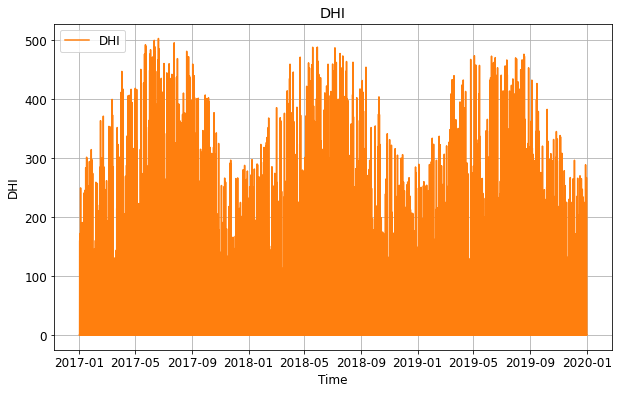

In [14]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df.DHI, color='tab:orange', label='DHI')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('DHI')
ax.set_title('DHI')
ax.grid(True)
ax.legend(loc='upper left');

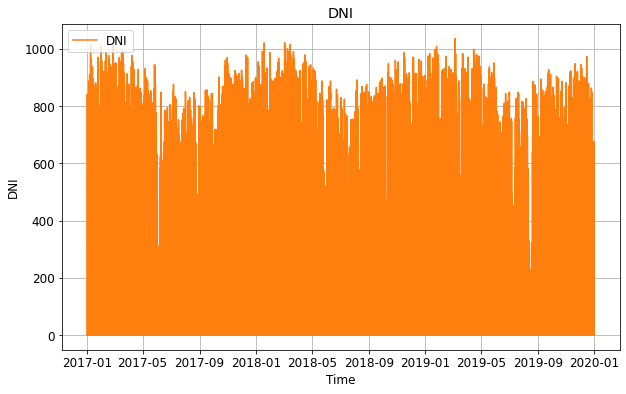

In [15]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df.DNI, color='tab:orange', label='DNI')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('DNI')
ax.set_title('DNI')
ax.grid(True)
ax.legend(loc='upper left');

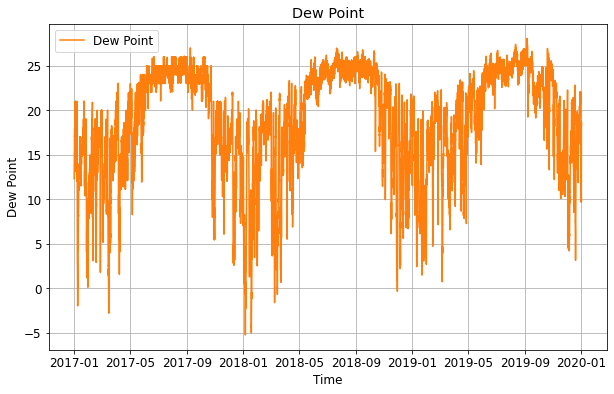

In [16]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Dew Point'], color='tab:orange', label='Dew Point')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Dew Point')
ax.set_title('Dew Point')
ax.grid(True)
ax.legend(loc='upper left');

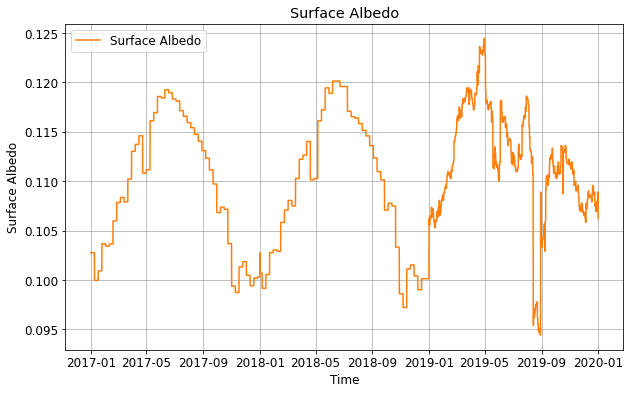

In [17]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Surface Albedo'], color='tab:orange', label='Surface Albedo')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Surface Albedo')
ax.set_title('Surface Albedo')
ax.grid(True)
ax.legend(loc='upper left');

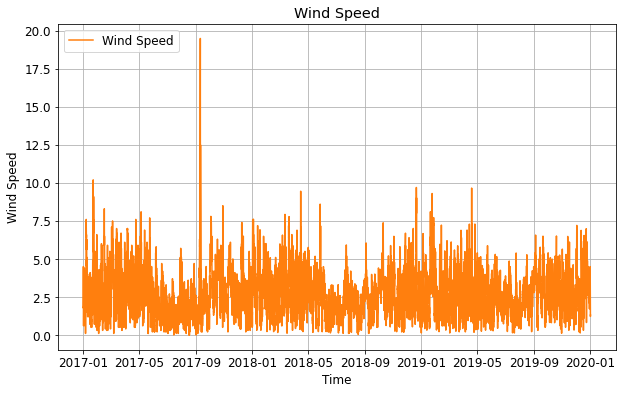

In [18]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Wind Speed'], color='tab:orange', label='Wind Speed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed')
ax.set_title('Wind Speed')
ax.grid(True)
ax.legend(loc='upper left');

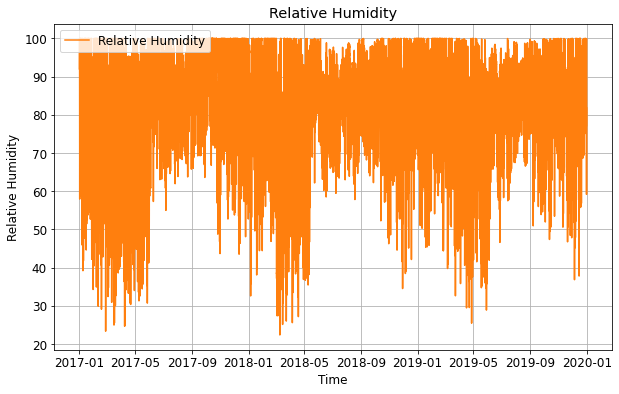

In [19]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Relative Humidity'], color='tab:orange', label='Relative Humidity')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Relative Humidity')
ax.set_title('Relative Humidity')
ax.grid(True)
ax.legend(loc='upper left');

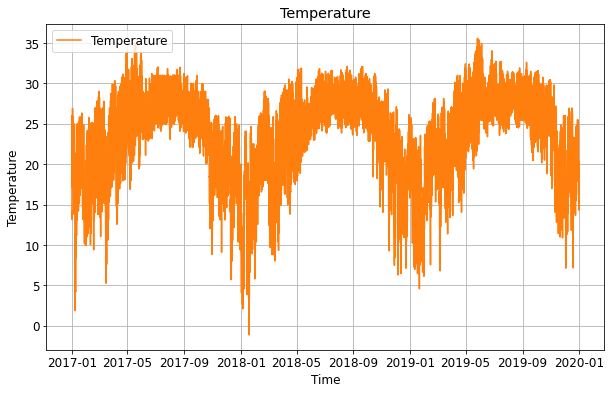

In [20]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Temperature'], color='tab:orange', label='Temperature')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature')
ax.grid(True)
ax.legend(loc='upper left');

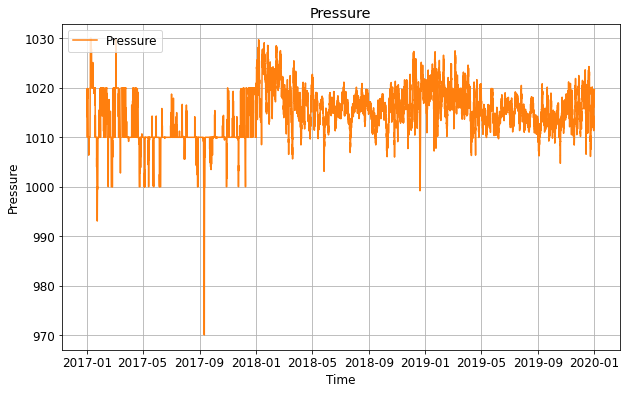

In [21]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Pressure'], color='tab:orange', label='Pressure')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure')
ax.grid(True)
ax.legend(loc='upper left');

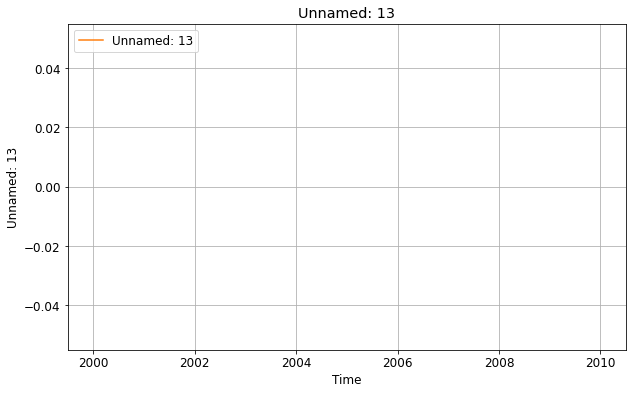

In [22]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Unnamed: 13'], color='tab:orange', label='Unnamed: 13')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Unnamed: 13')
ax.set_title('Unnamed: 13')
ax.grid(True)
ax.legend(loc='upper left');

In [23]:
df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Unnamed: 13,date_time
0,2017,1,1,0,0,0.000,0.000,12.292,0.103,1.800,92.030,14.167,1018.056,NaN,2017-01-01 00:00:00
1,2017,1,1,0,30,0.000,0.000,12.292,0.103,1.800,94.703,13.889,1017.361,NaN,2017-01-01 00:30:00
2,2017,1,1,1,0,0.000,0.000,12.403,0.103,1.800,95.498,13.889,1016.944,NaN,2017-01-01 01:00:00
3,2017,1,1,1,30,0.000,0.000,12.403,0.103,1.900,98.239,13.292,1016.389,NaN,2017-01-01 01:30:00
4,2017,1,1,2,0,0.000,0.000,13.028,0.103,2.000,99.624,13.292,1015.972,NaN,2017-01-01 02:00:00


In [24]:
subset = df[['Year','Month','Day','DHI','DNI','Dew Point','Surface Albedo','Wind Speed','Relative Humidity','Temperature','Pressure']]

In [25]:
# upsample weather_train dataframe to get daily means
weather_daily = subset.groupby(['Year','Month','Day']).mean()

In [26]:
weather_daily = weather_daily.reset_index()

In [27]:
weather_daily.head()

,Year,Month,Day,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,2017,1,1,39.242,258.878,15.337,0.103,2.371,82.571,19.250,1015.958
1,2017,1,2,43.313,239.409,18.696,0.103,2.246,88.515,21.258,1014.641
2,2017,1,3,61.317,159.666,20.065,0.103,2.844,92.768,21.703,1010.000
3,2017,1,4,39.817,252.903,16.669,0.103,2.573,86.417,19.696,1009.470
4,2017,1,5,46.278,237.352,14.236,0.103,1.694,84.132,17.811,1009.968


In [28]:
weather_daily['date_time'] = pd.to_datetime(weather_daily[['Year', 'Month', 'Day']])

In [29]:
ferc714_hourly_demand_tampa.head(10)

,Unnamed: 0,respondent_id_ferc714,report_date,utc_datetime,timezone,demand_mwh
0,546413,262,2017-01-01 00:00:00,2017-01-01 05:00:00,America/New_York,1549.000
1,1166556,262,2017-01-01 00:00:00,2017-01-01 06:00:00,America/New_York,1492.000
2,1786699,262,2017-01-01 00:00:00,2017-01-01 07:00:00,America/New_York,1424.000
3,2406842,262,2017-01-01 00:00:00,2017-01-01 08:00:00,America/New_York,1402.000
4,3026985,262,2017-01-01 00:00:00,2017-01-01 09:00:00,America/New_York,1390.000
5,3647128,262,2017-01-01 00:00:00,2017-01-01 10:00:00,America/New_York,1402.000
6,4267271,262,2017-01-01 00:00:00,2017-01-01 11:00:00,America/New_York,1432.000
7,4887414,262,2017-01-01 00:00:00,2017-01-01 12:00:00,America/New_York,1465.000
8,5507557,262,2017-01-01 00:00:00,2017-01-01 13:00:00,America/New_York,1547.000
9,6127700,262,2017-01-01 00:00:00,2017-01-01 14:00:00,America/New_York,1662.000


In [30]:
ferc714_hourly_demand_tampa.utc_datetime = pd.to_datetime(ferc714_hourly_demand_tampa.utc_datetime)

In [34]:
#ferc714_hourly_demand_tampa = ferc714_hourly_demand_tampa.reset_index()

In [35]:
ferc714_hourly_demand_tampa.head()

,utc_datetime,Unnamed: 0,respondent_id_ferc714,report_date,timezone,demand_mwh
0,2017-01-01 05:00:00,546413,262,2017-01-01 00:00:00,America/New_York,1549.000
1,2017-01-01 06:00:00,1166556,262,2017-01-01 00:00:00,America/New_York,1492.000
2,2017-01-01 07:00:00,1786699,262,2017-01-01 00:00:00,America/New_York,1424.000
3,2017-01-01 08:00:00,2406842,262,2017-01-01 00:00:00,America/New_York,1402.000
4,2017-01-01 09:00:00,3026985,262,2017-01-01 00:00:00,America/New_York,1390.000


In [36]:
#ferc714_daily_demand_tampa= ferc714_hourly_demand_tampa.groupby(by=[ferc714_hourly_demand_tampa.index.year, ferc714_hourly_demand_tampa.index.month, ferc714_hourly_demand_tampa.index.day])
#ferc714_daily_demand_tampa= ferc714_hourly_demand_tampa.groupby(pd.Grouper(freq='D'))
ferc714_daily_demand_tampa = ferc714_hourly_demand_tampa.resample('D', on='utc_datetime').mean()
ferc714_daily_demand_tampa = ferc714_daily_demand_tampa.reset_index()


In [37]:
ferc714_daily_demand_tampa.tail()

,utc_datetime,Unnamed: 0,respondent_id_ferc714,demand_mwh
1091,2019-12-28,7740103.292,262.000,1920.292
1092,2019-12-29,7740104.292,262.000,2017.542
1093,2019-12-30,7740105.292,262.000,2058.667
1094,2019-12-31,7740106.292,262.000,1860.792
1095,2020-01-01,13631465.000,262.000,1884.400


In [38]:
ferc714_daily_demand_tampa.shape

(1096, 4)

In [52]:
ferc714_daily_demand_tampa.drop('Unnamed: 0', axis = 1, inplace = True)

In [53]:
ferc714_daily_demand_tampa.to_csv('tampa_ferc714_daily_demand.csv', index = False)

In [39]:
weather_daily.tail()

,Year,Month,Day,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,date_time
1090,2019,12,27,48.488,162.813,19.340,0.107,3.911,91.101,20.951,1017.787,2019-12-27
1091,2019,12,28,59.367,81.485,20.671,0.107,3.258,93.443,21.856,1016.183,2019-12-28
1092,2019,12,29,65.098,127.879,21.019,0.108,2.684,93.385,22.210,1014.373,2019-12-29
1093,2019,12,30,63.508,30.978,20.709,0.108,3.005,94.292,21.708,1013.098,2019-12-30
1094,2019,12,31,64.959,120.178,12.767,0.108,3.245,76.253,17.167,1017.409,2019-12-31


In [41]:
weather_daily.shape

(1095, 12)

In [54]:
weather_daily.to_csv('tampa_weather_daily_2017-2019.csv', index = False)

In [42]:
weather_vs_demand_reading = (ferc714_daily_demand_tampa.
                            merge(weather_daily, 
                                  left_on='utc_datetime',
                                  right_on= 'date_time',
                                  how='left'))

In [43]:
weather_vs_demand_reading.shape

(1096, 16)

In [44]:
weather_vs_demand_reading.columns

Index(['utc_datetime', 'Unnamed: 0', 'respondent_id_ferc714', 'demand_mwh',
       'Year', 'Month', 'Day', 'DHI', 'DNI', 'Dew Point', 'Surface Albedo',
       'Wind Speed', 'Relative Humidity', 'Temperature', 'Pressure',
       'date_time'],
      dtype='object')

In [45]:
# create weather variables and color dictionary
weather_dict = {"Temperature": "red",
                "Pressure": "orange",
                "Dew Point": "coral",
                "Surface Albedo": "olive",
                "Relative Humidity": "teal",
                "DHI": "purple",
                "Wind Speed": "navy",
                "DNI": "green"
               }

/Users/anniecondon/anaconda3/envs/discovery/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




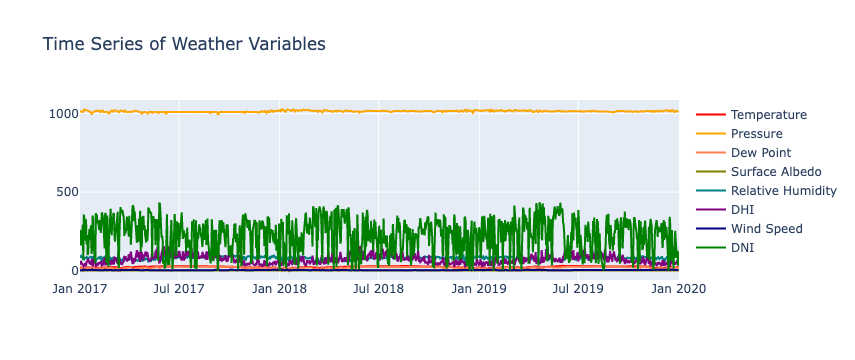

In [46]:
# create plotly object and plot weather variables against dates
fig = go.Figure()
    
for key in weather_dict:
    fig.add_trace(go
                  .Line(x=weather_vs_demand_reading['utc_datetime'],
                        y=weather_vs_demand_reading[key], 
                        name=key,
                        line_color=weather_dict[key]))
    
fig.update_layout(title_text='Time Series of Weather Variables')
fig.show()  

In [47]:
weather_vs_demand_reading.columns

Index(['utc_datetime', 'Unnamed: 0', 'respondent_id_ferc714', 'demand_mwh',
       'Year', 'Month', 'Day', 'DHI', 'DNI', 'Dew Point', 'Surface Albedo',
       'Wind Speed', 'Relative Humidity', 'Temperature', 'Pressure',
       'date_time'],
      dtype='object')

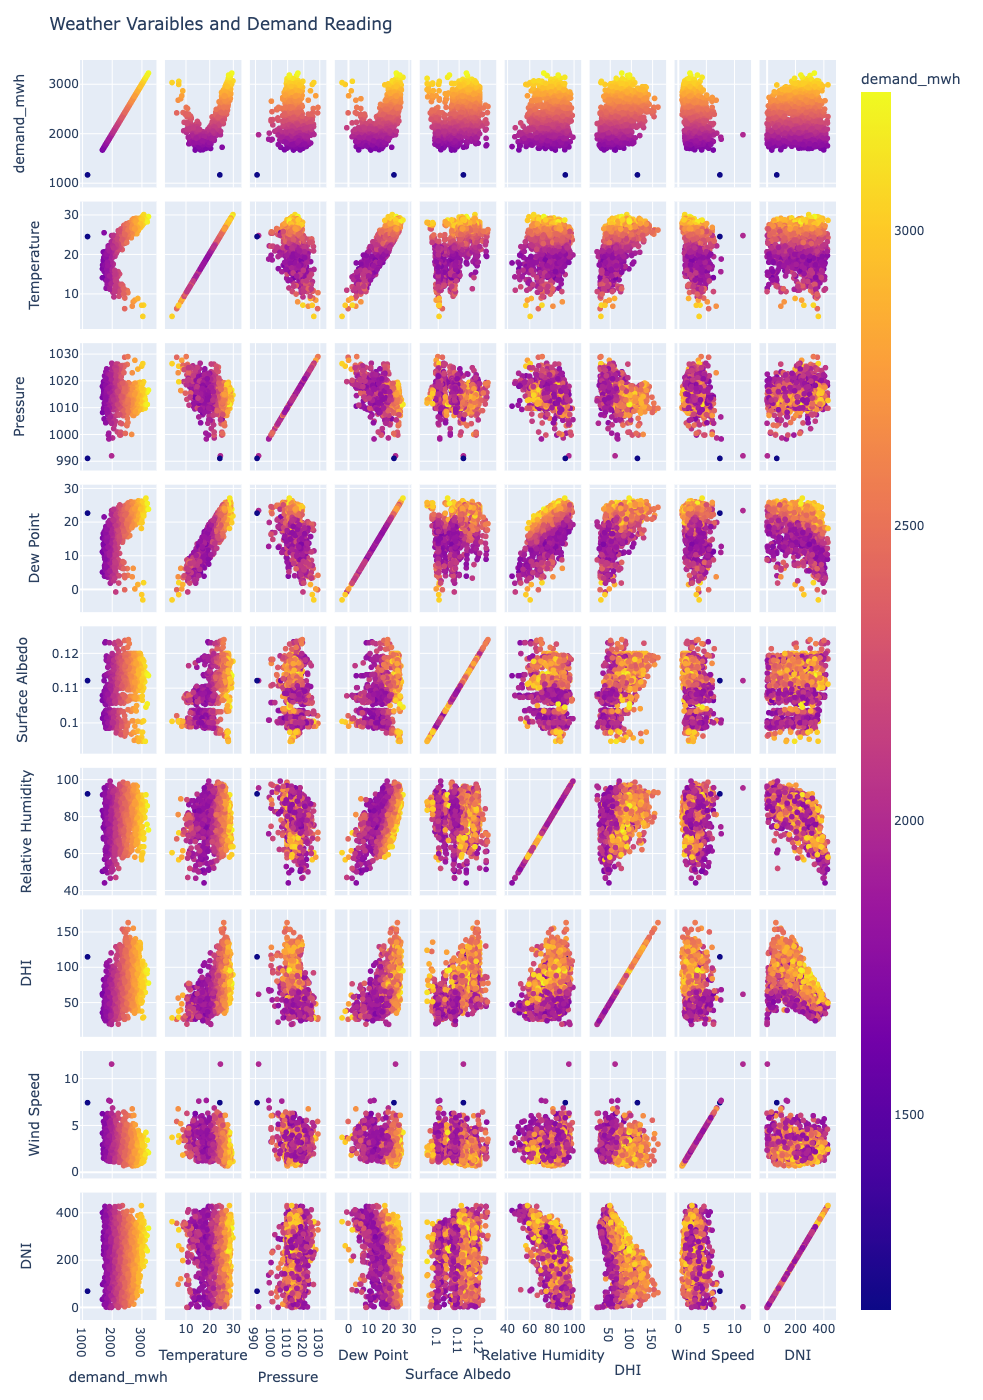

In [49]:
fig = px.scatter_matrix(weather_vs_demand_reading,
                        dimensions=["demand_mwh",
                                    "Temperature",
                                    "Pressure",
                                    "Dew Point",
                                    "Surface Albedo",
                                    "Relative Humidity",
                                    "DHI",
                                    "Wind Speed",
                                    "DNI"],
                        color="demand_mwh")

fig.update_layout(
    title='Weather Varaibles and Demand Reading',
    dragmode='select',
    width=1400,
    height=1400,
    hovermode='closest')

fig.update_traces(diagonal_visible=True)
fig.show()